# CLASSIFIY IMAGES (CIFAR-10) USING CNNS

### STEP 0: PROBLEM STATEMENT
CIFAR-10 is a dataset that consists of several images divided into the following 10 classes:
  * Airplanes
  * Cars
  * Birds
  * Cats
  * Deers
  * Dogs
  * Frogs
  * Horses
  * Ships
  * Strucks
 The Dataset stans for the Canadian Institute For Advancced Research (CIFAR)
 CIFA-10 is widely used for machine learning and computer applications.
 Images: 60000 images, 32X32 color  images, 6000 images for each class, low resolution
 Data Source: https://www.cs.toronto.edu/~kriz/cifar.html

### STEP 1: IMPORT DATASETS AND LIBRARIES

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [2]:
#import datasets
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 52s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

### STEP 2: VISUALIZE DATA

[1]


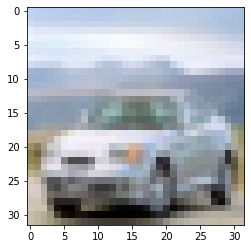

In [13]:
i = 49998
plt.imshow(X_train[i])
print(y_train[i])

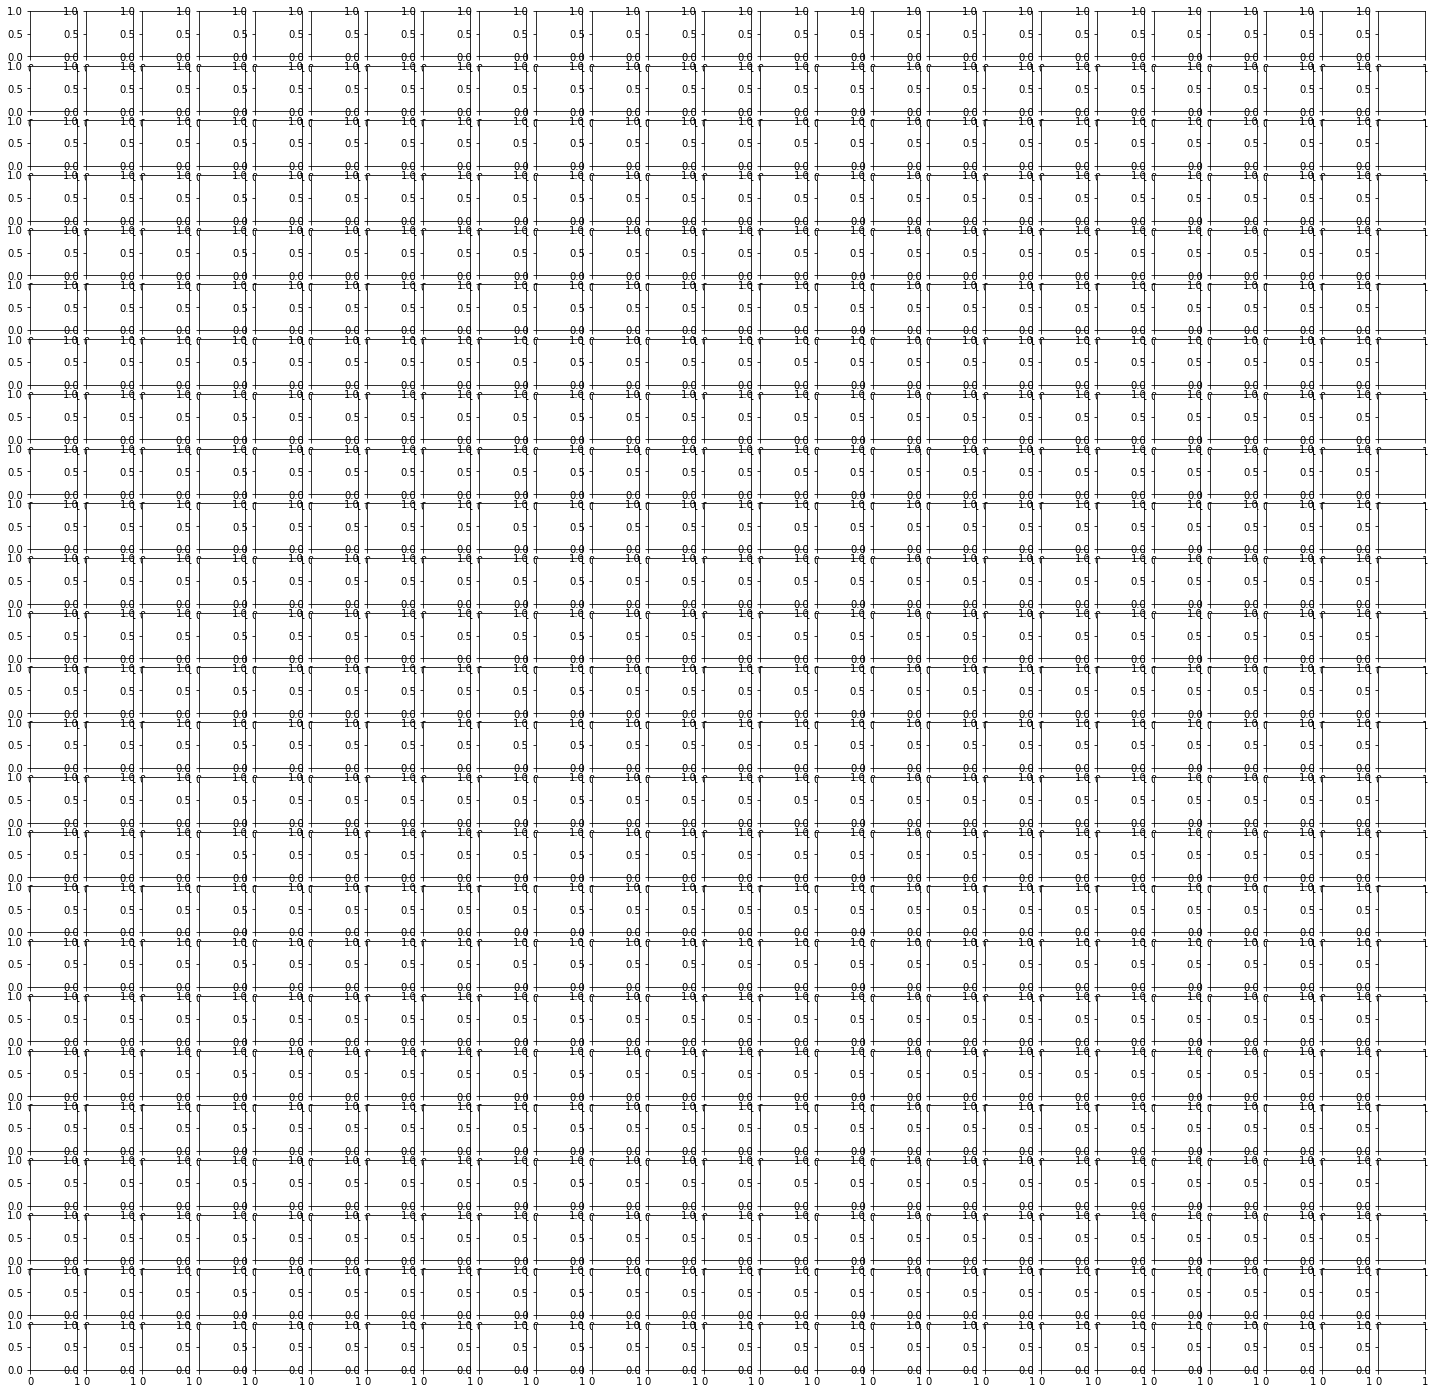

In [14]:
#print many images
W_grid = 25
L_grid = 25

fig, axes = plt.subplots(L_grid, W_grid, figsize=(25, 25))
axes = axes.ravel()

n_training = len(X_train)

In [15]:
n_training

50000

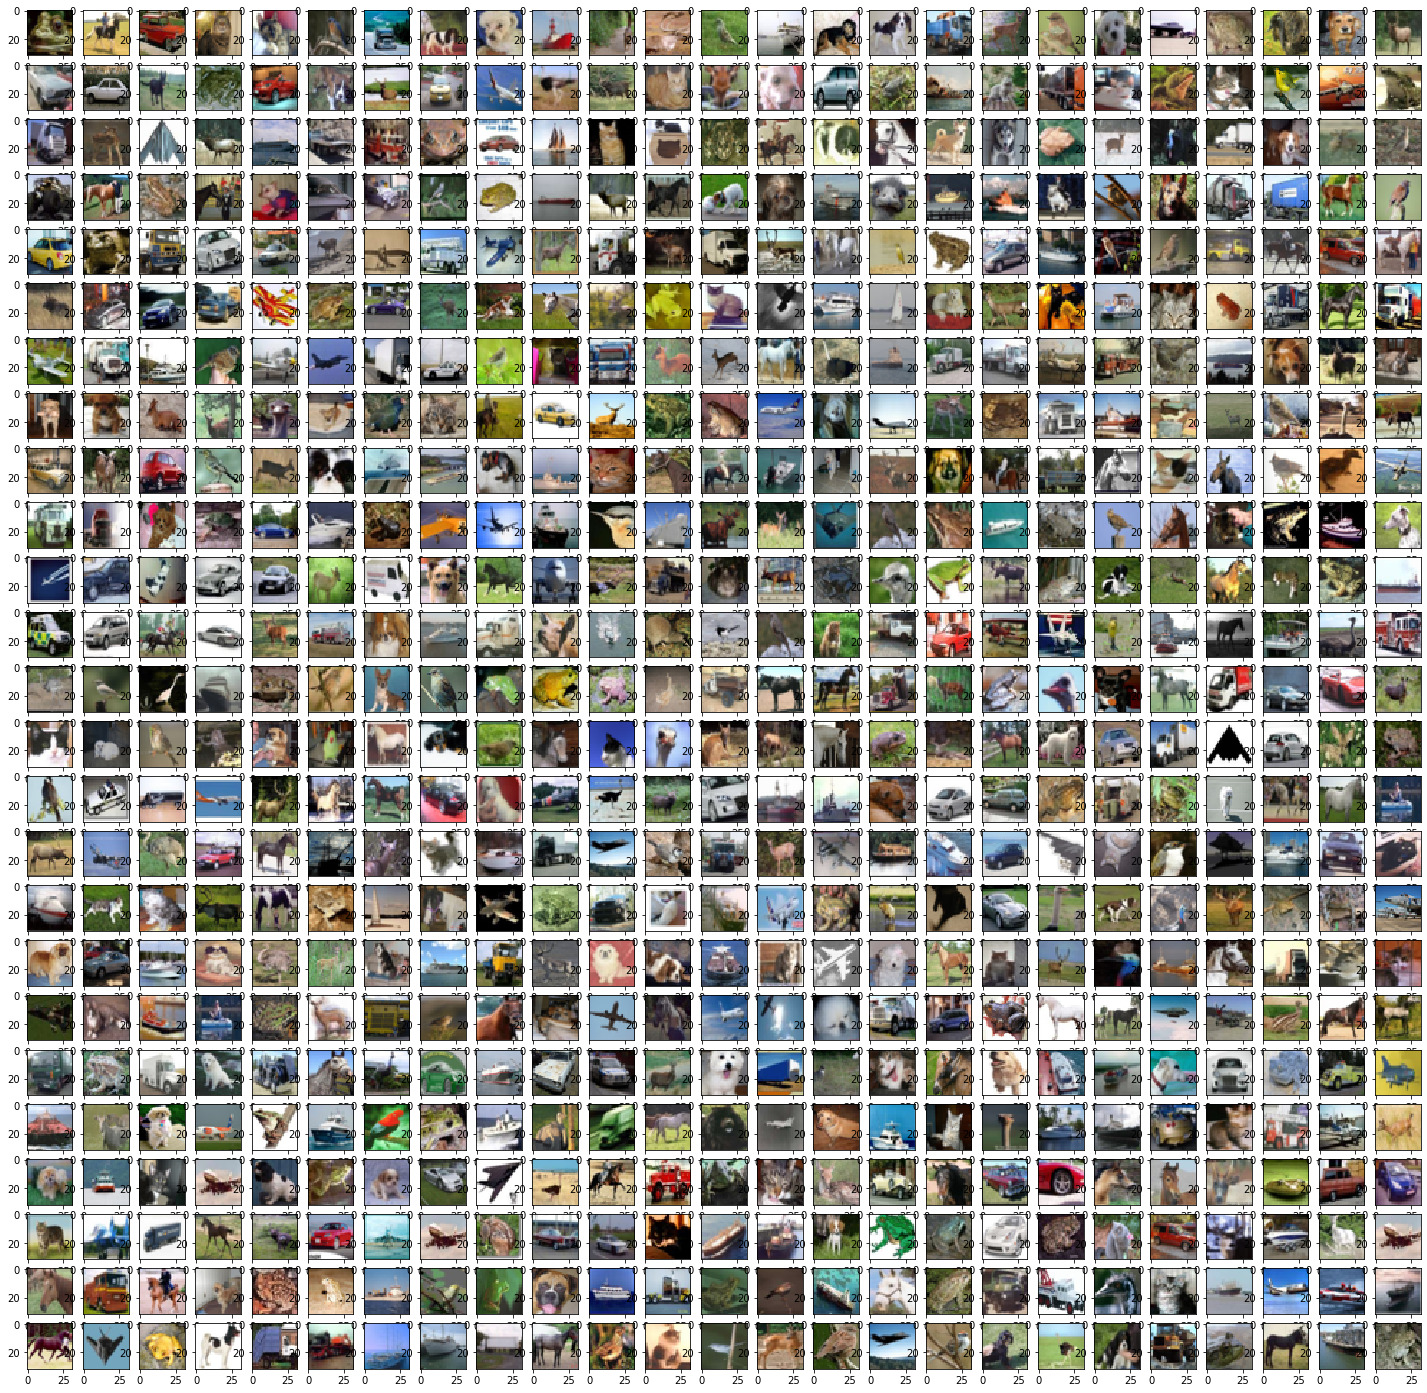

In [16]:
W_grid = 25
L_grid = 25

fig, axes = plt.subplots(L_grid, W_grid, figsize=(25, 25))
axes = axes.ravel()

n_training = len(X_train)
for i in np.arange(0, L_grid*W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    #axes[i]

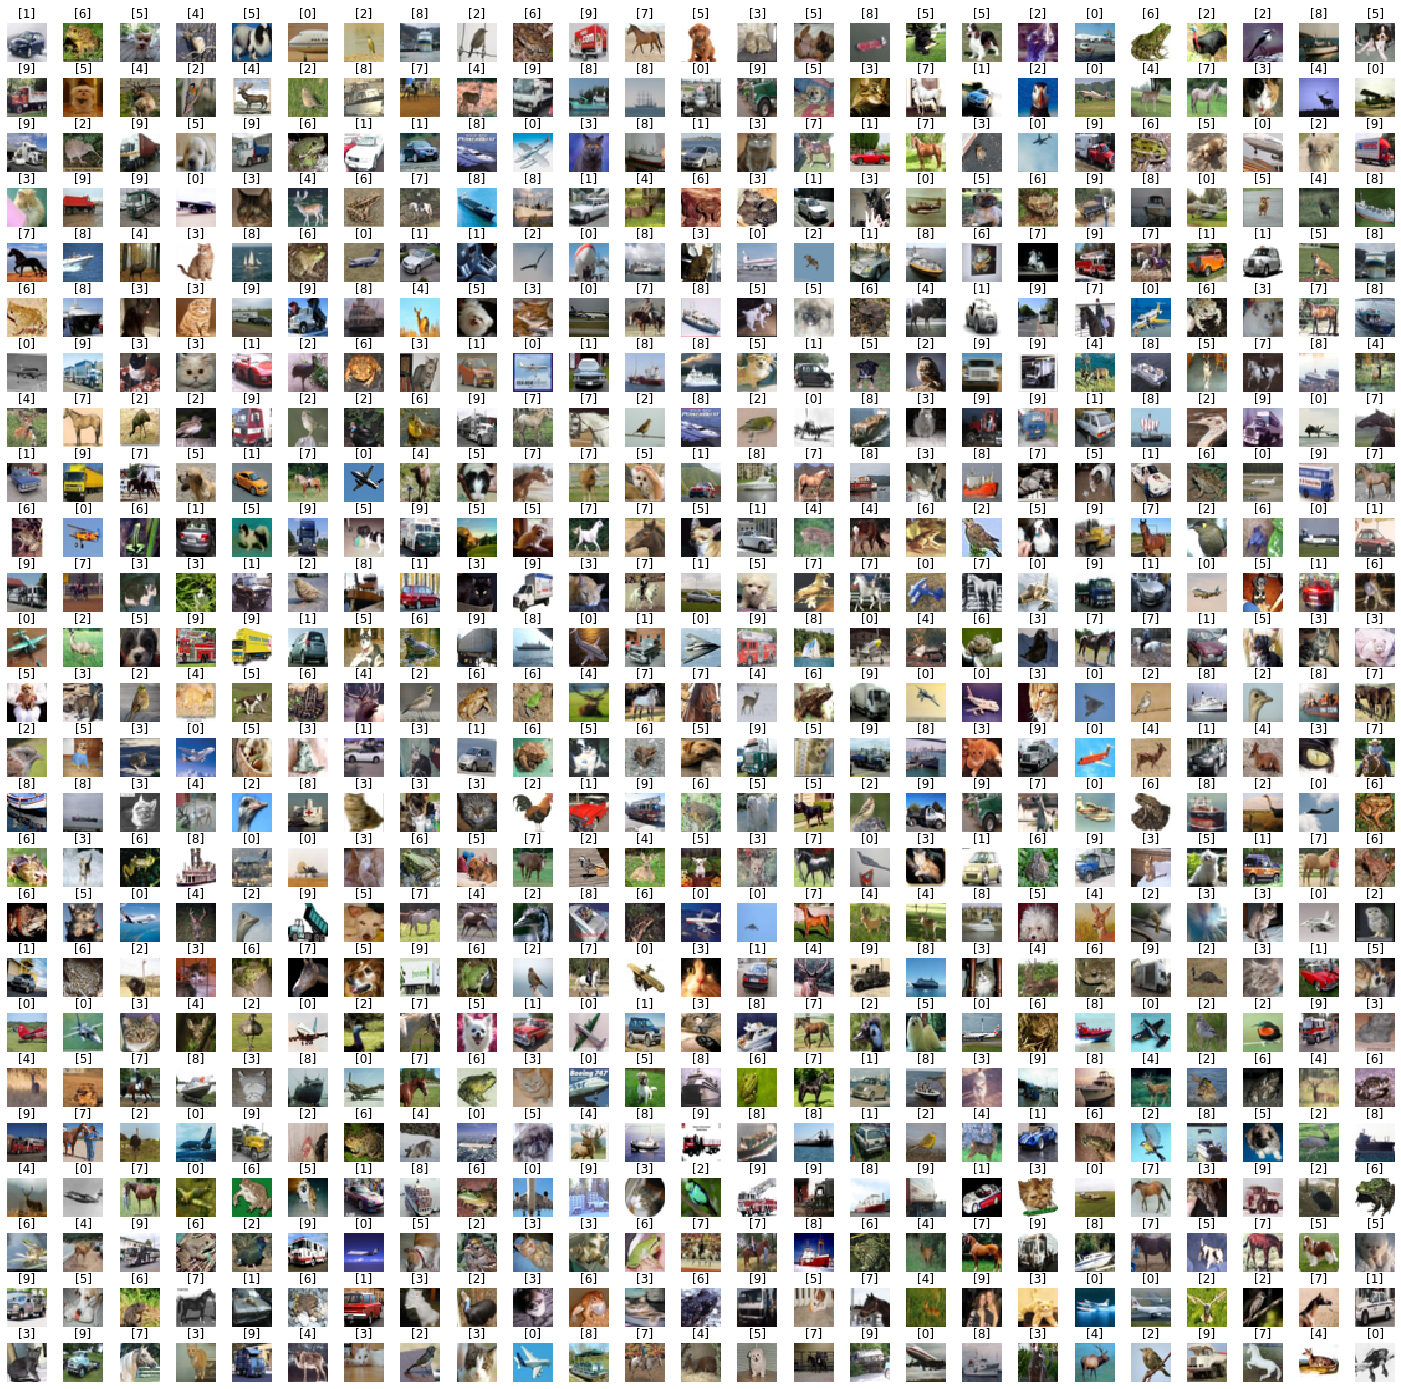

In [19]:
W_grid = 25
L_grid = 25

fig, axes = plt.subplots(L_grid, W_grid, figsize=(25, 25))
axes = axes.ravel()

n_training = len(X_train)
for i in np.arange(0, L_grid*W_grid):
    index = np.random.randint(0, n_training)#PICK A RANDOM NUMBER
    axes[i].imshow(X_train[index])
    #add label on images
    axes[i].set_title(y_train[index])
    #remove the axis information
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

### STEP 3: DATA PREPARATION

In [21]:
#change images into float type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [22]:
number_cat = 10

In [23]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [24]:
import keras

In [25]:
#to hot-code the y_train into categorical values
y_train = keras.utils.to_categorical(y_train, number_cat)

In [26]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [28]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [29]:
#normalize values
X_train = X_train/255
X_test = X_test/255

In [30]:
X_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

In [31]:
X_train.shape

(50000, 32, 32, 3)

In [32]:
Input_shape = X_train.shape[1:]

In [33]:
Input_shape

(32, 32, 3)

### STEP 4: TRAIN THE MODEL

In [35]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [39]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters =32, kernel_size= (3, 3), activation='relu', input_shape = Input_shape))

#filters=32: numbers of filter
#(3, 3): size of kernel
#Input_shape= (32, 32, 3) # 3=> depth of kernel =3 
cnn_model.add(Conv2D(filters =32, kernel_size = (3, 3), activation='relu'))
#cnn_model.add(Conv2D(filters =128, kernel_size = (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters =64, kernel_size= (3, 3), activation='relu'))
cnn_model.add(Conv2D(filters =64, kernel_size = (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation='relu'))
cnn_model.add(Dense(units = 512, activation='relu'))

cnn_mode.add(Dense(units= 10, activation= 'softmax'))#for the output from 0 o

### STEP 5: EVALUATE THE MODEL